# __TUGAS 6 METODE NUMERIK__
__Materi Solusi Persamaan Tak-Linear__

#### __3.5.2 Soal Pemrograman__

__Kelompok : AKT02__

__Anggota :__ 

```1. Antonius Aditya Rizky Wijaya (G5402221003)```

```2. Jokhanal Paskal Bastanta Brahmana (G5402221008)```

```3. Citra Dewi (G5402221035)```

```4. Muh. Fadhil Maulana Mulhayat (G5402221041)```

```5. Amanda Citra Lestari (G5402221048)```

```6. Khansa Paramytha Nareswari (G5402221062)```

<hr style="border:2px solid black"> </hr>

### Soal 1
Bandingkan penggunaan metode _bisection_ dan _regula falsi_ untuk menghitung nilai hampiran akar dari fungsi:

__(a)__ $f(x) = x^2 − e^x$ untuk $−2 ≤ x ≤ 2$

__(b)__ $f(x) = sin(x) − 2 cos(x)$ untuk $−2 ≤ x ≤ 2$

__(c)__ $f(x) = (x−2)^2 − ln(x)$ untuk $0.5 ≤ x ≤ 4.5$

__(d)__ $f(x) = 2x − tan(x)$ untuk $−1.4 ≤ x ≤ 1.4$

### Metode _Bisection_
Metode pertama yang dipelajari untuk mencari nilai hampiran akar persamaan adalah metode bagi-dua (_bisection_). Metode ini memiliki syarat, yaitu nilai evaluasi fungsi pada ujung selang $ [a,b] $ yaitu $ f(a) $ dan $ f(b) $ memiliki **tanda yang berbeda**.

In [53]:
using Plots

In [56]:
function bisection(f,a,b)
    # Definisikan nilai toleransi dan maksimum iterasi yang telah ditentukan.
    delta = 10^-7;
    maxi = 100;
    flag = 1;
    M = Array{Float64}(undef, 0, 5);
    # Cek Syarat kekonvergenan, yaitu f(a) dan f(b) harus berbeda tanda.
    fa = f(a);
    fb = f(b);
    if fa*fb>0
        c = "error: f(a) dan f(b) harus berbeda tanda";
        flag = 2; 
        return;
    end
    k = 1
    # Mulai proses metode bisection
    while k<=maxi
        # Isi dengan rumus bisection untuk mencari nilai c.
        c  = (b+a)/2; 
        fc = f(c); 
        M = [M; [k-1 a c b fc] ];
        # Analisa nilai tengah yang memiliki nilai tanda yang berbeda dengan titik ujung selang.
        if fc == 0
            a = c;
            b = c;
        elseif fa*fc>0
            a = c;
            fa = fc;
        else
            b = c;
            fb = fc;
        end
        # Kriteria pemberhentian
        if b-a < delta || abs(fc) < delta
            flag = 0;
            break;
        end
        k+=1
    end
    return c,flag, M
end;

### Metode _Regula Falsi_
Metode _regula falsi_ adalah pengembangan dari metode _bisection_ dengan memperbaiki pemilihan nilai tengah $ c $ diantara selang $ [a,b] $ untuk mengurangi jumlah iterasi dan waktu komputasi, yaitu $$ c=b - f(b)\frac{b-a}{f(b)-f(a)} $$

Sama seperti metode _bisection_, metode ini memiliki syarat yaitu nilai evaluasi fungsi pada ujung selang $ [a,b] $ yaitu $ f(a) $ dan $ f(b) $ memiliki **tanda yang berbeda**.

In [4]:
#=
METODE REGULA FALSI UNTUK MENCARI AKAR PERSAMAAN
 [c,flag,M] = regulaFalsi(f,a,b)
 Input  : f    -> fungsi f
          a,b  -> titik ujung selang [a,b]
 Output : c    -> solusi numerik dari nilai hampiran akar
          flag -> 0 -> toleransi terpehuhi
                  1 -> maksimum iterasi terpenuhi
                  2 -> error: f(a) dan f(b) memiliki tanda yang sama 
          M    -> Matriks yang berisi nilai iterasi, a, c, b, dan f(c)
=#
function regulaFalsi(f,a,b)
    # Definisikan nilai toleransi dan maksimum iterasi yang ditentukan.
    delta = 10^-7;
    maxi = 100;
    flag = 1;
    M = Array{Float64}(undef, 0, 5);
    # Cek Syarat kekonvergenan, yaitu f(a) dan f(b) harus berbeda tanda.
    fa = f(a);
    fb = f(b);
    if fa*fb > 0
        c = "error : fa fb harus beda tanda";
        flag = 2; 
        return;
    end 
    # Mulai proses metode regula falsi
    for k = 1:maxi
        c = b-fb*(b-a)/(fb-fa);# Isi dengan rumus nilai c regula falsi.
        fc = f(c); 
        dx = min(c-a,b-c);
        M = [M ; [k-1 a c b fc] ]; 
        # Analisa nilai tengah dengan titik ujung selang.
        if fc == 0
            a = c;
            b = c;
        elseif fa*fc>0
            a = c;
            fa= fc;
        else
            b = c;
            fb= fc;
        end
        # Kriteria pemberhentian
        if abs(fc) < delta || abs(dx)< delta
            flag = 0; break;
        end
    end
    return c,flag,M
end;

__(a)__ $f(x) = x^2 − e^x$ untuk $−2 ≤ x ≤ 2$

In [90]:
#Bisection
f(x) = x^2 − exp(x);
a = -2; b = 2;

c, flag, M = bisection(f,a,b)
@show c
@show flag
M

c = -0.7034674286842346
flag = 0


26×5 Matrix{Float64}:
  0.0  -2.0        0.0        2.0       -1.0
  1.0  -2.0       -1.0        0.0        0.632121
  2.0  -1.0       -0.5        0.0       -0.356531
  3.0  -1.0       -0.75      -0.5        0.0901334
  4.0  -0.75      -0.625     -0.5       -0.144636
  5.0  -0.75      -0.6875    -0.625     -0.0301753
  6.0  -0.75      -0.71875   -0.6875     0.0292405
  7.0  -0.71875   -0.703125  -0.6875    -0.000651131
  8.0  -0.71875   -0.710938  -0.703125   0.0142486
  9.0  -0.710938  -0.707031  -0.703125   0.00678725
 10.0  -0.707031  -0.705078  -0.703125   0.00306519
 11.0  -0.705078  -0.704102  -0.703125   0.00120631
 12.0  -0.704102  -0.703613  -0.703125   0.00027741
 13.0  -0.703613  -0.703369  -0.703125  -0.000186905
 14.0  -0.703613  -0.703491  -0.703369   4.52413e-5
 15.0  -0.703491  -0.70343   -0.703369  -7.08348e-5
 16.0  -0.703491  -0.703461  -0.70343   -1.27975e-5
 17.0  -0.703491  -0.703476  -0.703461   1.62218e-5
 18.0  -0.703476  -0.703468  -0.703461   1.71211e-6
 19.0

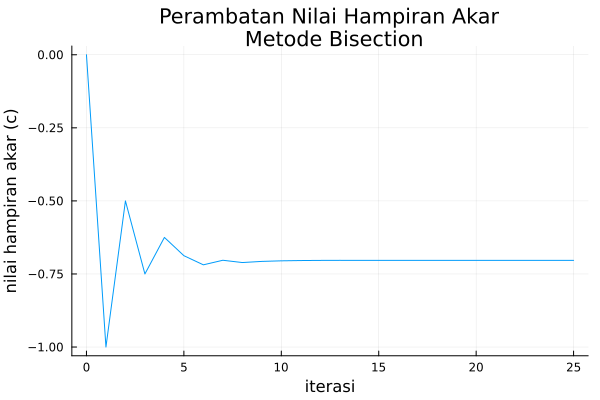

In [91]:
# Ambil nilai c untuk setiap n dari matriks M
iter = M[:,1];
cn = M[:,3];
# Plot cn
using Plots
p = plot(iter, cn, label = :none)
title!("Perambatan Nilai Hampiran Akar\n Metode Bisection")
xlabel!("iterasi")
ylabel!("nilai hampiran akar (c)")

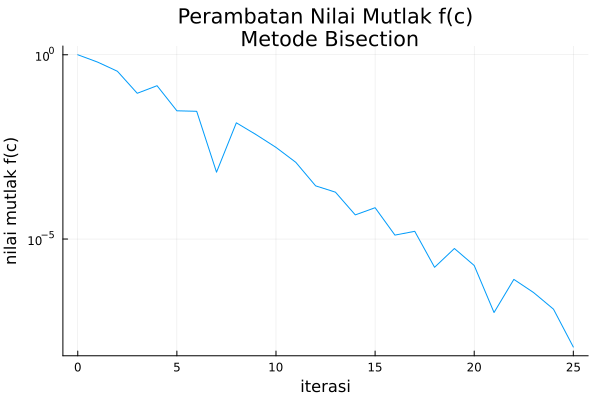

In [92]:
# Ambil nilai mutlak f(c) untuk setiap n dari matriks M
iter = M[:,1];
fc = abs.(M[:,5]);
# Plot cn
using Plots
plot(iter,fc, yaxis = :log, label = :none)
title!("Perambatan Nilai Mutlak f(c)\n Metode Bisection")
xlabel!("iterasi")
ylabel!("nilai mutlak f(c)")

In [93]:
# Regula Falsi
f(x) = x^2 − exp(x);
a = -2; b = 2;

 c, flag, M = regulaFalsi(f,a,b)
@show c
@show flag
M

c = -0.7034673878605076
flag = 0


18×5 Matrix{Float64}:
  0.0  -2.0   0.131135   2.0       -1.12293
  1.0  -2.0  -0.348677   0.131135  -0.584045
  2.0  -2.0  -0.56547   -0.348677  -0.248337
  3.0  -2.0  -0.652085  -0.56547   -0.0957444
  4.0  -2.0  -0.684671  -0.652085  -0.0354818
  5.0  -2.0  -0.696637  -0.684671  -0.0129546
  6.0  -2.0  -0.700992  -0.696637  -0.00470394
  7.0  -2.0  -0.702571  -0.700992  -0.00170465
  8.0  -2.0  -0.703143  -0.702571  -0.000617295
  9.0  -2.0  -0.70335   -0.703143  -0.00022348
 10.0  -2.0  -0.703425  -0.70335   -8.08987e-5
 11.0  -2.0  -0.703452  -0.703425  -2.9284e-5
 12.0  -2.0  -0.703462  -0.703452  -1.06002e-5
 13.0  -2.0  -0.703465  -0.703462  -3.83703e-6
 14.0  -2.0  -0.703467  -0.703465  -1.38891e-6
 15.0  -2.0  -0.703467  -0.703467  -5.02754e-7
 16.0  -2.0  -0.703467  -0.703467  -1.81985e-7
 17.0  -2.0  -0.703467  -0.703467  -6.58744e-8

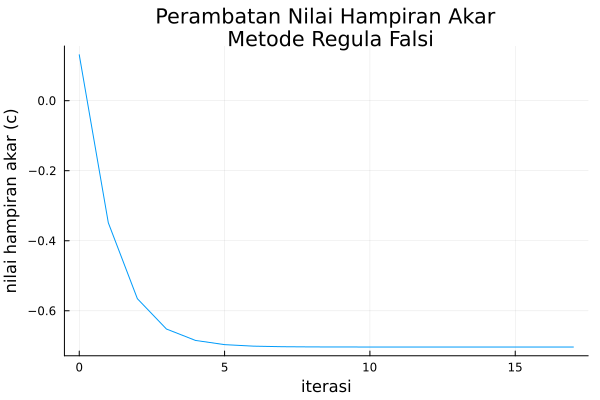

In [94]:
# Ambil nilai c untuk setiap n dari matriks M
iter = M[:,1];
cn = M[:,3];
# Plot cn
using Plots
p1 = plot(iter, cn, label = :none)
# Tambahkan title dan label
title!("Perambatan Nilai Hampiran Akar\n Metode Regula Falsi")
xlabel!("iterasi")
ylabel!("nilai hampiran akar (c)")

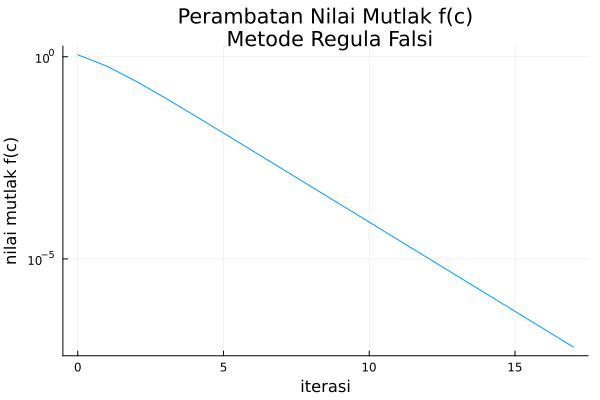

In [95]:
# Ambil nilai mutlak f(c) untuk setiap n dari matriks M
iter = M[:,1];
fc = abs.(M[:,5]);
# Plot cn
using Plots
p2 = plot(iter,fc, yaxis = :log, label = :none)
# Tambahkan title dan label
title!("Perambatan Nilai Mutlak f(c)\n Metode Regula Falsi")
xlabel!("iterasi")
ylabel!("nilai mutlak f(c)")

Perambatan nilai hampiran akar c menggunakan metode bisection menghasilkan nilai hampiran akar bernilai -0.7034674286842346 pada iterasi ke-25, sedangkan perambatan nilai hampiran akar c menggunakan metode regula falsi menghasilkan nilai hampiran akar bernilai -0.7034673878605076 pada iterasi ke-17.

__(b)__ $f(x) = sin(x) − 2 cos(x)$ untuk $−2 ≤ x ≤ 2$

In [96]:
# Bisection
f(x) = sin(x) −2*cos(x);
a = -2; b = 2;

c, flag, M = bisection(f,a,b)
@show c
@show flag
M

c = 1.1071487069129944
flag = 0


26×5 Matrix{Float64}:
  0.0  -2.0      0.0      2.0      -2.0
  1.0   0.0      1.0      2.0      -0.239134
  2.0   1.0      1.5      2.0       0.856021
  3.0   1.0      1.25     1.5       0.31834
  4.0   1.0      1.125    1.25      0.0399146
  5.0   1.0      1.0625   1.125    -0.0998044
  6.0   1.0625   1.09375  1.125    -0.0299595
  7.0   1.09375  1.10938  1.125     0.00497811
  8.0   1.09375  1.10156  1.10938  -0.0124911
  9.0   1.10156  1.10547  1.10938  -0.00375652
 10.0   1.10547  1.10742  1.10938   0.000610798
 11.0   1.10547  1.10645  1.10742  -0.00157286
 12.0   1.10645  1.10693  1.10742  -0.000481032
 13.0   1.10693  1.10718  1.10742   6.4883e-5
 14.0   1.10693  1.10706  1.10718  -0.000208074
 15.0   1.10706  1.10712  1.10718  -7.15957e-5
 16.0   1.10712  1.10715  1.10718  -3.35633e-6
 17.0   1.10715  1.10716  1.10718   3.07634e-5
 18.0   1.10715  1.10715  1.10716   1.37035e-5
 19.0   1.10715  1.10715  1.10715   5.17359e-6
 20.0   1.10715  1.10715  1.10715   9.08629e-7
 21.0  

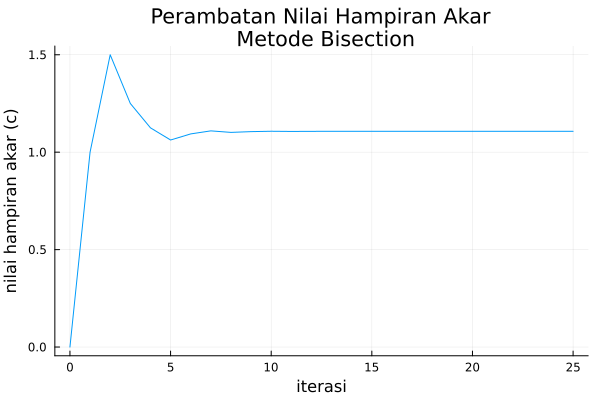

In [97]:
# Ambil nilai c untuk setiap n dari matriks M
iter = M[:,1];
cn = M[:,3];
# Plot cn
using Plots
p = plot(iter, cn, label = :none)
title!("Perambatan Nilai Hampiran Akar\n Metode Bisection")
xlabel!("iterasi")
ylabel!("nilai hampiran akar (c)")

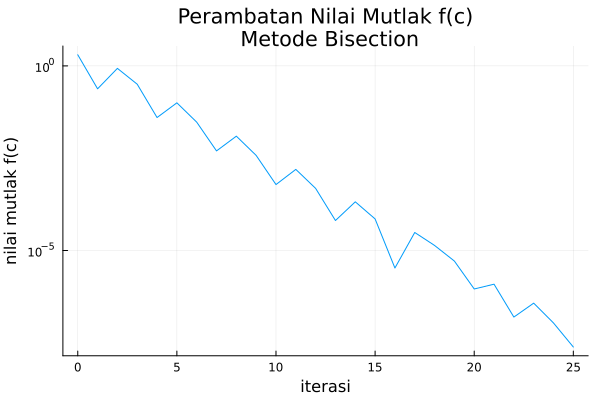

In [98]:
# Ambil nilai mutlak f(c) untuk setiap n dari matriks M
iter = M[:,1];
fc = abs.(M[:,5]);
# Plot cn
using Plots
plot(iter,fc, yaxis = :log, label = :none)
title!("Perambatan Nilai Mutlak f(c)\n Metode Bisection")
xlabel!("iterasi")
ylabel!("nilai mutlak f(c)")

In [99]:
# Regula Falsi
f(x) = sin(x) − 2*cos(x);
a = -2; b = 2;

 c, flag, M = regulaFalsi(f,a,b)
@show c
@show flag
M

c = 1.1071487177940122
flag = 0


7×5 Matrix{Float64}:
 0.0  -2.0      -1.83063  2.0      -0.452593
 1.0  -1.83063  -1.04049  2.0      -1.87425
 2.0  -1.04049   0.53553  2.0      -1.2097
 3.0   0.53553   1.1358   2.0       0.0640556
 4.0   0.53553   1.10561  1.1358   -0.00343538
 5.0   1.10561   1.10715  1.1358    4.44825e-7
 6.0   1.10561   1.10715  1.10715  -1.74971e-13

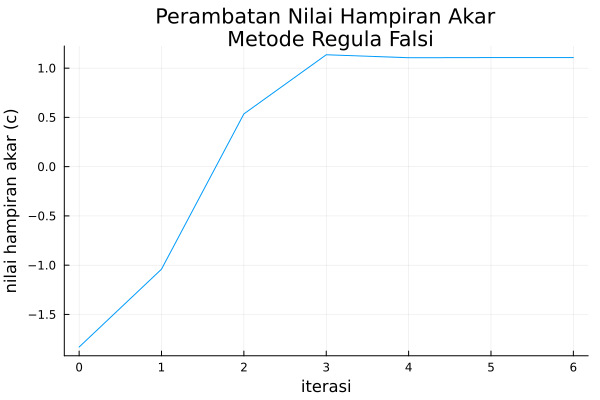

In [100]:
# Ambil nilai c untuk setiap n dari matriks M
iter = M[:,1];
cn = M[:,3];
# Plot cn
using Plots
p1 = plot(iter, cn, label = :none)
# Tambahkan title dan label
title!("Perambatan Nilai Hampiran Akar\n Metode Regula Falsi")
xlabel!("iterasi")
ylabel!("nilai hampiran akar (c)")

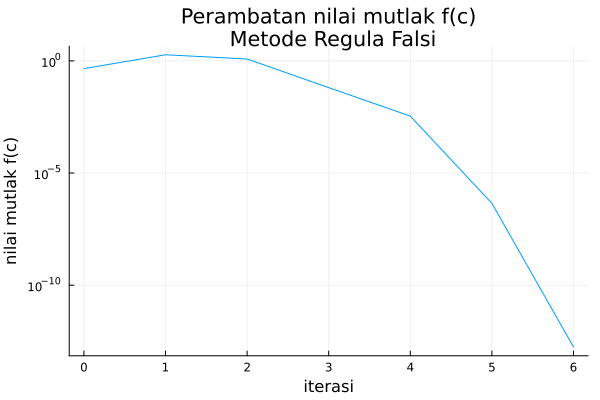

In [101]:
# Ambil nilai mutlak f(c) untuk setiap n dari matriks M
iter = M[:,1];
fc = abs.(M[:,5]);
# Plot cn
using Plots
p2 = plot(iter,fc, yaxis = :log, label = :none)
# Tambahkan title dan label
title!("Perambatan nilai mutlak f(c)\n Metode Regula Falsi")
xlabel!("iterasi")
ylabel!("nilai mutlak f(c)")

Perambatan nilai hampiran akar c menggunakan metode bisection menghasilkan nilai hampiran akar bernilai 1.1071487069129944 pada iterasi ke-25, sedangkan perambatan nilai hampiran akar c menggunakan metode regula falsi menghasilkan nilai hampiran akar bernilai 1.1071487177940122 pada iterasi ke-6.

__(c)__ $f(x) = (x−2)^2 − ln(x)$ untuk $0.5 ≤ x ≤ 4.5$

In [102]:
f(x) = (x - 2)^2 - log(x)
a = 0.5; b= 4.5;

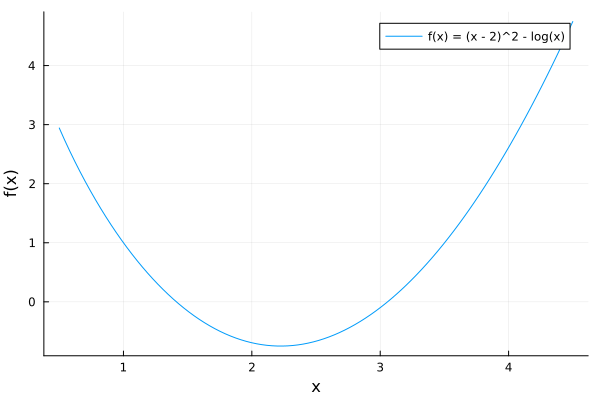

In [103]:
using Plots

# Definisikan fungsi
f(x) = (x - 2)^2 - log(x)

# Tentukan rentang
x_values = range(0.5, stop=4.5, length=100)
y_values = f.(x_values)

# Plot fungsi
plot(x_values, y_values, xlabel="x", ylabel="f(x)", label="f(x) = (x - 2)^2 - log(x)", legend=:topright)

__(d)__ $f(x) = 2x − tan(x)$ untuk $−1.4 ≤ x ≤ 1.4$

Root using bisection method    : 0.0
Root using regula falsi method : -0.0


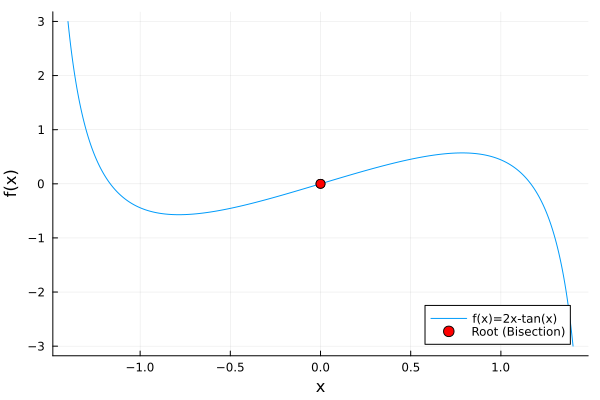

In [108]:
using Plots

function f(x)
    return 2x - tan(x)
end

# Metode Bisection untuk fungsi (d)
function bisection(f, a, b, tol, max_iter)
    iter = 0
    while iter < max_iter
        c = (a + b) / 2
        if f(c) == 0 || (b - a) / 2 < tol
            return c
        end
        if f(c) * f(a) < 0
            b = c
        else
            a = c
        end
        iter += 1
    end
    return "Method failed after max iterations"
end

# Metode Regula Falsi untuk fungsi (d)
function regula_falsi(f, a, b, tol, max_iter)
    iter = 0
    while iter < max_iter
        c = (a*f(b) - b*f(a)) / (f(b) - f(a))
        if f(c) == 0 || abs(f(c)) < tol
            return c
        end
        if f(c) * f(a) < 0
            b = c
        else
            a = c
        end
        iter += 1
    end
    return "Method failed after max iterations"
end

a, b = -1.4, 1.4
tol = 1e-6
max_iter = 1000

root_bisection = bisection(f, a, b, tol, max_iter)
root_regula_falsi = regula_falsi(f, a, b, tol, max_iter)

println("Root using bisection method    : ", root_bisection)
println("Root using regula falsi method : ", root_regula_falsi)

# Plotting the function and roots
x = range(a, stop=b, length=1000)
y = f.(x)

plot(x, y, label="f(x)=2x-tan(x)", xlabel="x", ylabel="f(x)", legend=:bottomright)
scatter!([root_bisection, root_regula_falsi], [0, 0], label=["Root (Bisection)" "Root (Regula Falsi)"], color=:red, markersize=5)

<hr style="border:2px solid black"> </hr>

### Soal 3
Diberikan fungsi
$$f(x) = (x−2)^2 −ln(x)$$
pada interval $x ∈ [1,2]$

__(a)__ Buktikan bahwa fungsi $f(x)$ pada selang tersebut memiliki tepat satu akar.

__(b)__ Gunakan metode _bisection_ untuk menghitung nilai akar persamaan hingga memiliki 6 digit desimal akurasi.

__(c)__ Berapa banyak iterasi yang diperlukan untuk memenuhi akurasi tersebut.

#### 3a

In [78]:
f(x) = (x - 2)^2 - log(x)

a = 1.0
b = 2.0
fa = f(a)
fb = f(b)

if fa * fb < 0 #dua akar bisection berlawanan tanda, jadi otomatis jika dikalikan akan < 0
    println("Fungsi f(x) memiliki tepat satu akar pada interval [1,2].")
else
    println("Fungsi f(x) tidak memiliki tepat satu akar pada interval [1,2].")
end

Fungsi f(x) memiliki tepat satu akar pada interval [1,2].


#### 3b

In [79]:
# Fungsi Bisection

function bisection(f,a,b)
    # Definisikan nilai toleransi dan maksimum iterasi yang telah ditentukan.
    delta = 10^-7;
    maxi = 100;
    flag = 1;
    M = Array{Float64}(undef, 0, 5);
    # Cek Syarat kekonvergenan, yaitu f(a) dan f(b) harus berbeda tanda.
    fa = f(a);
    fb = f(b);
    if fa*fb>0
        c = "error: f(a) dan f(b) harus berbeda tanda";
        flag = 2; 
        return;
    end
    k = 1
    # Mulai proses metode bisection
    while k<=maxi
        # Isi dengan rumus bisection untuk mencari nilai c.
        c  = (b+a)/2; 
        fc = f(c); 
        M = [M; [k-1 a c b fc] ];
        # Analisa nilai tengah yang memiliki nilai tanda yang berbeda dengan titik ujung selang.
        if fc == 0
            a = c;
            b = c;
        elseif fa*fc>0
            a = c;
            fa = fc;
        else
            b = c;
            fb = fc;
        end
        # Kriteria pemberhentian
        if b-a < delta || abs(fc) < delta
            flag = 0;
            break;
        end
        k+=1
    end
    return c,flag, M
end;

In [80]:
f(x) = (x - 2)^2 - log(x);
a = 1; b = 2;

In [81]:
c, flag, M = bisection(f,a,b)
@show c
@show flag
println("\nAkar fungsi f(x) = (x - 2)^2 - log(x) pada interval [1,2] dengan akurasi 6 digit desimal adalah ", c)

c = 1.412391185760498
flag = 0

Akar fungsi f(x) = (x - 2)^2 - log(x) pada interval [1,2] dengan akurasi 6 digit desimal adalah 1.412391185760498


#### 3c

In [82]:
M

21×5 Matrix{Float64}:
  0.0  1.0      1.5      2.0      -0.155465
  1.0  1.0      1.25     1.5       0.339356
  2.0  1.25     1.375    1.5       0.0721713
  3.0  1.375    1.4375   1.5      -0.0464992
  4.0  1.375    1.40625  1.4375    0.0116125
  5.0  1.40625  1.42188  1.4375   -0.0177479
  6.0  1.40625  1.41406  1.42188  -0.00314401
  7.0  1.40625  1.41016  1.41406   0.00421514
  8.0  1.41016  1.41211  1.41406   0.00053079
  9.0  1.41211  1.41309  1.41406  -0.0013078
 10.0  1.41211  1.4126   1.41309  -0.000388805
 11.0  1.41211  1.41235  1.4126    7.09177e-5
 12.0  1.41235  1.41248  1.4126   -0.000158962
 13.0  1.41235  1.41241  1.41248  -4.40271e-5
 14.0  1.41235  1.41238  1.41241   1.34442e-5
 15.0  1.41238  1.4124   1.41241  -1.52917e-5
 16.0  1.41238  1.41239  1.4124   -9.23866e-7
 17.0  1.41238  1.41239  1.41239   6.26013e-6
 18.0  1.41239  1.41239  1.41239   2.66813e-6
 19.0  1.41239  1.41239  1.41239   8.72128e-7
 20.0  1.41239  1.41239  1.41239  -2.58693e-8

Jumlah Iterasi yang diperlukan adalah 20 iterasi

<hr style="border:2px solid black"> </hr>

### Soal 14
Carilah dua akar persamaan dari
$$f(x) = 2^x − 2x$$

### Metode Iterasi Titik Tetap
Metode **iterasi titik tetap** yaitu metode untuk mencari nilai akar persamaan dengan mentransformasi bentuk $f(x)=0$ menjadi bentuk $x=g(x)$, sehingga diperoleh persamaan iterasi.

In [83]:
#=
%%ITERASI TITIK TETAP
% [pn, flag] = fixpoint(g,p0)
% Input  : g    -> fungsi g
%          p0   -> starting value
% Output : pn   -> nilai akar
%          flag -> tanda : 0 -> berhasil
%                          1 -> gagal
%          M    -> matriks yang berisi nilai iterasi, hampiran akar dan
%                  galat
=#

function g(x)
    return 2^x - 2*x
end;

function fixpoint(g,p0)
    # Definisikan nilai toleransi, maksimum iterasi dan tebakan awal yang telah ditentukan.
    delta = 10^-7;
    maxi = 100;
    flag = 1;
    pn = p0
    M = [0 pn NaN];
    # Mulai langkah iterasi
    for n = 2:maxi
        # Rumus iterasi titik tetap
        pn1 = pn;
        pn = g(pn1);
        # Hitung nilai galat mutlak dan relatif
        err = abs(pn-pn1);
        relerr = err/(abs(pn)+eps()); 
        M = [M; [n-1 pn err]]
        # Kriteria penghentian iterasi jika galat memenuhi toleransi.
        if (err<delta) || (relerr<delta)
            flag = 0; break
        end
    end
    return pn, flag, M
end;

In [84]:
# Mencari akar pertama (Misal titik awal = 0.25)
p0 = 0.25;
akar1, flag1, M1 = fixpoint(g, p0)
println("Akar pertama: ", akar1)

Akar pertama: 0.9999676930533119


In [85]:
# Mencari akar kedua (Misal titik awal = 0.5)
p0 = 0.5;
akar2, flag2, M2 = fixpoint(g, p0)
println("Akar kedua: ", akar2)

Akar kedua: 0.0012629825911332215


<hr style="border:2px solid black"> </hr>

### Soal 15
Pada tahun 1225 Leonardo of Pisa mempelajari persamaan
$$x^3 +2x^2 + 10x − 20 = 0$$

dan menemukan akar yaitu $x = 1.368 808 107$. Tidak ada satupun orang yang mengetahui metode yang digunakan untuk mencari nilai tersebut. Akan tetapi, itu merupakan hal luar biasa untuk memperoleh 9 digit desimal pada jaman itu. Carilah akar persamaan tersebut dengan metode yang telah anda pelajari.

In [109]:
f(x) = x^3 + 2*x^2 + 10*x - 20 ;
a = 1; b = 2;

In [110]:
#metode bisection
c, flag, M =  bisection(f,a,b)
@show c
@show flag
M

c = 1.368808090686798
flag = 0


24×5 Matrix{Float64}:
  0.0  1.0      1.5      2.0       2.875
  1.0  1.0      1.25     1.5      -2.42188
  2.0  1.25     1.375    1.5       0.130859
  3.0  1.25     1.3125   1.375    -1.1687
  4.0  1.3125   1.34375  1.375    -0.524811
  5.0  1.34375  1.35938  1.375    -0.19846
  6.0  1.35938  1.36719  1.375    -0.0341725
  7.0  1.36719  1.37109  1.375     0.0482501
  8.0  1.36719  1.36914  1.37109   0.0070155
  9.0  1.36719  1.36816  1.36914  -0.0135843
 10.0  1.36816  1.36865  1.36914  -0.00328587
 11.0  1.36865  1.3689   1.36914   0.00186445
 12.0  1.36865  1.36877  1.3689   -0.000710801
 13.0  1.36877  1.36884  1.3689    0.000576802
 14.0  1.36877  1.3688   1.36884  -6.70051e-5
 15.0  1.3688   1.36882  1.36884   0.000254897
 16.0  1.3688   1.36881  1.36882   9.39457e-5
 17.0  1.3688   1.36881  1.36881   1.34702e-5
 18.0  1.3688   1.36881  1.36881  -2.67674e-5
 19.0  1.36881  1.36881  1.36881  -6.64861e-6
 20.0  1.36881  1.36881  1.36881   3.41081e-6
 21.0  1.36881  1.36881  1.36881

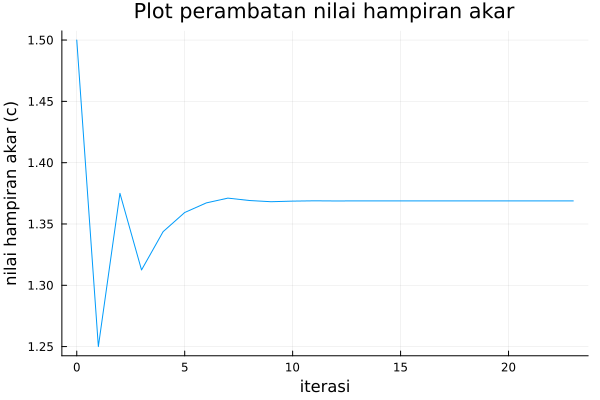

In [111]:
using Plots
# Ambil nilai c untuk setiap n dari matriks M
iter = M[:,1];
cn = M[:,3];
# Plot cn
p = plot(iter, cn, label = :none)
title!("Plot perambatan nilai hampiran akar")
xlabel!("iterasi")
ylabel!("nilai hampiran akar (c)")

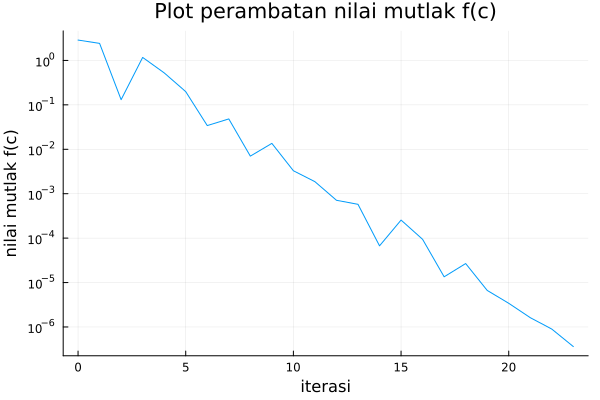

In [112]:
using Plots
# Ambil nilai mutlak f(c) untuk setiap n dari matriks M
iter = M[:,1];
fc = abs.(M[:,5]);
# Plot cn
plot(iter,fc, yaxis = :log, label = :none)
title!("Plot perambatan nilai mutlak f(c)")
xlabel!("iterasi")
ylabel!("nilai mutlak f(c)")

<hr style="border:2px solid black"> </hr>